# LightGBM binary classification on the Higgs dataset with GPU support
Binary classification performed on the [HIGGS dataset](https://archive.ics.uci.edu/ml/datasets/HIGGS) using the LightGBM model. The training is GPU accelerated. This notebook recreates most of the settings from the official [GPU tuning guide](https://lightgbm.readthedocs.io/en/latest/GPU-Performance.html).

## Download HIGGS dataset
The dataset contains 10.5 million records and 28 features. It was produced using Monte Carlo simulations, a computationally expensive procedure. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks are presented in the original paper. The last 500,000 examples are used as a test set. The first column is the class label (1 for signal, 0 for background), followed by the 28 features

In [2]:
!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

--2021-09-29 00:00:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2816407858 (2.6G) [application/x-httpd-php]
Saving to: ‘HIGGS.csv.gz’

HIGGS.csv.gz        100%[===================>]   2.62G  19.1MB/s    in 5m 38s  

2021-09-29 00:06:01 (7.95 MB/s) - ‘HIGGS.csv.gz’ saved [2816407858/2816407858]



## LightGBM GPU installation
Command lines for building and installing LightGBM with GPU support. Instructions are adapted from [here](https://www.kaggle.com/kirankunapuli/ieee-fraud-lightgbm-with-gpu).

In [3]:
!git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 23415, done.
remote: Counting objects: 100% (1094/1094), done.
remote: Compressing objects: 100% (647/647), done.
remote: Total 23415 (delta 660), reused 715 (delta 426), pack-reused 22321
Receiving objects: 100% (23415/23415), 18.12 MiB | 29.92 MiB/s, done.
Resolving deltas: 100% (17059/17059), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/opt/notebooks/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21733, done.        
remote: Counting objects: 100% (5/5), done.        
re

In [9]:
!apt-get update
!apt-get install -y -qq libboost-all-dev cmake

Hit:1 https://download.docker.com/linux/ubuntu bionic InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease              
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease    
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease                  
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done                     
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package liblzo2-2:amd64.
(

### Build and install LightGBM with GPU support

In [10]:
%%bash
cd LightGBM
mkdir build
cd build
cmake -DUSE_GPU=1 -DOpenCL_LIBRARY=/usr/local/cuda/lib64/libOpenCL.so -DOpenCL_INCLUDE_DIR=/usr/local/cuda/include/ ..
make -j$(nproc)

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - not found
-- Looking for CL_VERSION_2_1
-- Looking for CL_VERSION_2_1 - not found
-- Looking for CL_VERSION_2_0
-- Looking for CL_VERSION_2_0 - not found
-- Looking for CL_VERSION_1_2
-- Looking

mkdir: cannot create directory ‘build’: File exists


In [11]:
!cd LightGBM/python-package/;python setup.py install --precompile

running install
running build
running build_py
creating build
creating build/lib
creating build/lib/lightgbm
copying lightgbm/__init__.py -> build/lib/lightgbm
copying lightgbm/basic.py -> build/lib/lightgbm
copying lightgbm/callback.py -> build/lib/lightgbm
copying lightgbm/compat.py -> build/lib/lightgbm
copying lightgbm/dask.py -> build/lib/lightgbm
copying lightgbm/engine.py -> build/lib/lightgbm
copying lightgbm/libpath.py -> build/lib/lightgbm
copying lightgbm/plotting.py -> build/lib/lightgbm
copying lightgbm/sklearn.py -> build/lib/lightgbm
running egg_info
creating lightgbm.egg-info
writing lightgbm.egg-info/PKG-INFO
writing dependency_links to lightgbm.egg-info/dependency_links.txt
writing requirements to lightgbm.egg-info/requires.txt
writing top-level names to lightgbm.egg-info/top_level.txt
writing manifest file 'lightgbm.egg-info/SOURCES.txt'
reading manifest file 'lightgbm.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
no previously-included directories fo

In [12]:
# This line is VERY important. It seems to be responsible for enabling OpenCL support
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd
!rm -r LightGBM

## Install and import Python packages

In [13]:
!pip install -q scikit-learn
!pip install -q pandas

In [38]:
from lightgbm import LGBMClassifier, plot_importance
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

## Load the HIGGS dataset into a pandas dataframe and split into train/test sets

In [15]:
higgs = pd.read_csv('HIGGS.csv.gz', delimiter=',', header=None)

In [16]:
# view summary of dataset
higgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000000 entries, 0 to 10999999
Data columns (total 29 columns):
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
dtypes: float64(29)
memory usage: 2.4 GB


In [18]:
higgs

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999995,1.0,1.159912,1.013847,0.108615,1.495524,-0.537545,2.342396,-0.839740,1.320683,0.000000,...,-0.097068,1.190680,3.101961,0.822136,0.766772,1.002191,1.061233,0.837004,0.860472,0.772484
10999996,1.0,0.618388,-1.012982,1.110139,0.941023,-0.379199,1.004656,0.348535,-1.678593,2.173076,...,-0.216995,1.049177,3.101961,0.826829,0.989809,1.029104,1.199679,0.891481,0.938490,0.865269
10999997,1.0,0.700559,0.774251,1.520182,0.847112,0.211230,1.095531,0.052457,0.024553,2.173076,...,1.585235,1.713962,0.000000,0.337374,0.845208,0.987610,0.883422,1.888438,1.153766,0.931279
10999998,0.0,1.178030,0.117796,-1.276980,1.864457,-0.584370,0.998519,-1.264549,1.276333,0.000000,...,1.399515,-1.313189,0.000000,0.838842,0.882890,1.201380,0.939216,0.339705,0.759070,0.719119


In [26]:
X = higgs.iloc[:, 1:]
y = higgs.iloc[:, 0]

X_train = X[:-500000]
y_train = y[:-500000]

X_test = X[-500000:]
y_test = y[-500000:]

## LightGBM Model Development and Training

In [48]:
clf = LGBMClassifier(
    max_bin = 63,
    num_leaves = 255,
    num_iterations = 2000,
    learning_rate = 0.1,
    tree_learner = 'serial',
    task = 'train',
    is_training_metric = False,
    min_data_in_leaf = 1,
    min_sum_hessian_in_leaf = 100,
    ndcg_eval_at = [1,3,5,10],
    device = 'gpu',
    gpu_platform_id = 0,
    gpu_device_id = 0,
    num_thread = 28,
    seed = 69420
    )

In [49]:
clf.fit(X_train, y_train, eval_set=(X_test, y_test))

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_threads is set with num_thread=28, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[1]	valid_0's binary_logloss: 0.670266
[2]	valid_0's binary_logloss: 0.652803
[3]	valid_0's binary_logloss: 0.638149
[4]	valid_0's binary_logloss: 0.625659
[5]	valid_0's binary_logloss: 0.614859
[6]	valid_0's binary_logloss: 0.60554
[7]	valid_0's binary_logloss: 0.59748
[8]	valid_0's binary_logloss: 0.590398
[9]	valid_0's binary_logloss: 0.584196
[10]	valid_0's binary_logloss: 0.578654
[11]	valid_0's binary_logloss: 0.573734
[12]	valid_0's binary_logloss: 0.569243
[13]	valid_0's binary_logloss: 0.565361
[14]	valid_0's binary_logloss: 0.561929
[15]	valid_0's binary_logloss: 0.558581
[16]	valid_0's binary_loglos

LGBMClassifier(device='gpu', gpu_device_id=0, gpu_platform_id=0,
               is_training_metric=False, max_bin=63, min_data_in_leaf=1,
               min_sum_hessian_in_leaf=100, ndcg_eval_at=[1, 3, 5, 10],
               num_iterations=2000, num_leaves=255, num_thread=28, seed=69420,
               task='train', tree_learner='serial')

## Model prediction and evaluation

In [50]:
y_pred = clf.predict(X_test)

In [51]:
auroc = roc_auc_score(y_test, y_pred)
print('LightGBM Model auROC score: {0:0.4f}'.format(auroc))

LightGBM Model auROC score: 0.7682


## Plot feature importance

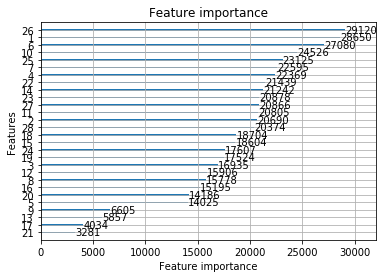

In [52]:
plot_importance(clf)